# ViT vs CNN

In [1]:
import glob
from typing import List

import BiT
from ViT import modeling as ViT

from PIL import Image
from PIL.Image import Image as Img
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torchvision.transforms as T

In [2]:
dataset_path = 'images'

In [3]:
def get_weights(path):
  return np.load(path)

## Prepare dataset and model

In [4]:
IMG_SIZE = (384, 384)
NORMALIZE_MEAN = (0.5, 0.5, 0.5)
NORMALIZE_STD = (0.5, 0.5, 0.5)
transforms = [
              T.Resize(IMG_SIZE),
              T.ToTensor(),
              T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
              ]

transforms = T.Compose(transforms)

In [5]:
def load_images(dataset_path: str) -> List[Img]:
    images = []
    for filename in glob.glob(dataset_path + '/*'):
        im=Image.open(filename).convert('RGB')
        images.append(im)
    return images


def load_vit(model_name='ViT-B_16', path='imagenet21k+imagenet2012_ViT-B_16.npz') -> nn.Module:
    config = ViT.CONFIGS[model_name]
    model = ViT.VisionTransformer(config, num_classes=1000, img_size=384, vis=True)
    model.load_from(get_weights(path))
    return model

def load_bit(model_name='BiT-M-R50x3', path='BiT-M-R50x3-ILSVRC2012.npz') -> nn.Module:
    model = BiT.KNOWN_MODELS[model_name](head_size=1000)
    model.load_from(get_weights(path))
    return model

In [6]:
images = load_images(dataset_path)
vit = load_vit()
bit = load_bit()

img = images[1]
img_tensor = transforms(img).unsqueeze(0)
out_vit = vit(img_tensor)
out_bit = bit(img_tensor)

/Users/piotrhelm/Desktop/IN/miniproj/python/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


## Compare predictions

In [7]:
assert np.allclose(out_vit[0].detach().numpy(), out_bit.detach().numpy()), '\033[93m' 'Failed test!'

print('\033[92m' 'Passed test!')

AssertionError: [93mFailed test!

In [8]:
print(out_vit[0].shape, out_bit.shape)

torch.Size([1, 1000]) torch.Size([1, 1000])


In [9]:
imagenet_labels = dict(enumerate(open('ilsvrc2012_wordnet_lemmas.txt')))

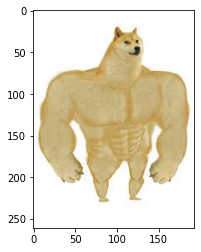

In [10]:
plt.imshow(img)

In [11]:
cls_ordered = [imagenet_labels[int(i)] for i in np.argsort(out_vit[0].detach().numpy())[0]]
print("Inference Result:")
print(cls_ordered[-3:])

Inference Result:
['Siberian_husky\n', 'white_wolf, Arctic_wolf, Canis_lupus_tundrarum\n', 'Eskimo_dog, husky\n']


In [12]:
cls_ordered = [imagenet_labels[int(i)] for i in np.argsort(out_bit.detach().numpy())[0]]
print("Inference Result:")
print(cls_ordered[-3:])

Inference Result:
['Arctic_fox, white_fox, Alopex_lagopus\n', 'ice_bear, polar_bear, Ursus_Maritimus, Thalarctos_maritimus\n', 'white_wolf, Arctic_wolf, Canis_lupus_tundrarum\n']


## Compare activation maps

In [ ]:
# TODO

## Compare embeddings clusters

In [ ]:
# TODO